### Numerical Method for ODEs

#### Take-aways

After studying this chapter, we will be able to

- explain what we mean by 'solve an ordinary differential equation (ODE)' or an initial value theorem (IVP),
  - draw slope field and integral curves,
  - draw discrete integral curves (this is not an official terminology) on slope a field, 
  - explain how integral curves and its discrete versions are related,
- discuss the existence and uniqueness of the solution of an ODE,
  - write, check, and use Lipschitz continuity,
  - state the most common form of Picard-Lindelof theorem,
  - check whether an ODE has a unique solution,
- explain important concepts related numerical methods for ODEs,
  - explain what is the local truncation errors and what is global errors,
  - explain consistency and consistency order,
  - explain what is zero-stability,
  - write the root condition,
  - explain stiffness of ODEs,
- explain each class of numerical methods, i.e., Runge-Kutta methods, linear multi-step methods,
  - explain ideas behind the methods in an intuitive language,
  - give a good estimate of the order of accuracy for important methods from the efficiency-accuracy trade-off point of view,
  - decide zero-stability of multi-step methods,
  - decide the convergence of multi-step methods,
- explain what to be careful of when choosing a numerical method for ODEs,
  - explain Dahlquist first and second barrier theorem,
  - explain what methods are recommended for stiff ODEs,


> **Warning**
>
> This topic is quite a "big chunk," meaning it is hard to see the whole picture until we finish the discussions and reiterate them. A special patience is needed. 

#### Overview

##### Problem of interest

> **Problem of interest** (initial value problem)
>
>  Given an ordinary differential equation (ODE) supplemented with an initial condition
> $$\begin{cases} \frac{d}{dt} x(t) = f(t, x) & (t>t_0) \\ x(t_0) = x_0, & \end{cases}$$
>
> find a function $x(t)$ that satisfies the equality, where $t_0, x_0\in \mathbb{R}$, $x:[t_0,\infty)\to\mathbb{R}$, and $f:[t_0,\infty)\times\mathbb{R}\to\mathbb{R}$.


> **Terminology**
>
> - IVP: An ODE supplemented with an initial condition is called *initial value problem* (IVP). 

> **Usual settings and notation**
>
> The following will be assumed unless otherwise mentioned:
>
> - Initial time: $t_0=0$
> - Final time: $T<\infty$ 
>   - For computational purposes, we usually assume some finite final time.
>   - Therefore, we usually want a solution $x:[0,T]\to\mathbb{R}$.
> - time derivative: $\dot x (t) :=\frac{d}{dt} x(t)=x^\prime(t)$ (we often follow physics convention)

> **Example** (A slope field and solutions to ODE)
> 
> ![Slope field and integral curves](https://ximera.osu.edu/ode/main/directionFields/fig010304.jpg)
>
> Figure: Slope field ($f(t,x)=\frac{t-x}{1+t^2}$) and integral curves (https://ximera.osu.edu/)
>
> Each curves corresponds to a solution to the ODE $\dot x=\frac{t-x}{1+t^2}$ associated to a different initial condition $x(0)=x_0$.

> **Big picture** (Solutions to ODE and their numerical solutions)
>
> Under certain conditions (so that we do not need to worry about technical issues),
> - for each initial condition $x(0)=x_0$, there is a unique solution $x(t)$. We can think of this as an *evolution* of a system or *trajectory* of a particle.
> - For each IVP, different numerical methods lead to different numerical solutions while the true solution is unique.
> - Each numerical method differs by what kind of slope we use to compute the next position.
>
> ![Different numerical methods for the same IVP](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Numerical_integration_illustration%2C_step%3D1.svg/800px-Numerical_integration_illustration%2C_step%3D1.svg.png)
>
> Figure: Wikipedia (Illustration of numerical integration for the differential equation; IVP $\dot x(t)=x$, $x(0)=1$; Blue - Euler method; Green - Midpoint method; Red - Exact solution)


##### Methods 

1. Taylor series methods (single step)
2. Runge-Kutta methods (single step)
3. Linear multistep methods
   1. Adam-Bashforth methods
   2. Adam-Moulton methods
   3. Backward differentation formulas (BDFs)

##### Important concepts

- Lipschitz conditunity
- Local truncation errors (LTE)
- Consistency and consistency order (or order of accuracy)
- Zero stability
- Global errors
- Convergence of numerical methods for ODEs
- Dahlquist barriers

##### Important preliminary

- Taylor's theorem for 2D functions. (Math 6A)

| | |
|---|---|
| [2D Taylor review 1](https://jhparkyb.github.io/resources/notes/vcal/expos_2DTaylorIntro1Review1D_lp1000.png) | [2D Taylor review 2](https://jhparkyb.github.io/resources/notes/vcal/expos_2DTaylorIntro2Poly2D_lp1000.png)| 
| [2D Taylor review 3](https://jhparkyb.github.io/resources/notes/vcal/expos_2DTaylorIntro3QuadAppr1_lp1000.png)| [2D Taylor review 4](https://jhparkyb.github.io/resources/notes/vcal/expos_2DTaylorIntro3QuadAppr2_lp1000.png)|
| [2D Taylor review 5](https://jhparkyb.github.io/resources/notes/vcal/ex_CalQuadForm_lp2000.png)| [2D Taylor review 6 <br> (Theorem)](https://jhparkyb.github.io/resources/notes/vcal/thm_2orderTaylor2D_lp2000.png) | 
| [2D Taylor review 7](https://jhparkyb.github.io/resources/notes/vcal/thm_2orderTaylor2DIncVecForm_lp2000.png)| [2D Taylor review 8](https://jhparkyb.github.io/resources/notes/vcal/ex_Cal2DTaylor01_1_lp2000.png)|
| [2D Taylor review 9](https://jhparkyb.github.io/resources/notes/vcal/ex_Cal2DTaylor01_2_lp2000.png)| [2D Taylor review 10](https://jhparkyb.github.io/resources/notes/vcal/expos_OrganizingHessianEntries_lp2000.png)| | |


#### Existence and uniqueness

> **Motivation**
> 
> The problem of interest in this chapter is less when it comes to whether the problem even makes sense, that is, *whether the solution actually exists*. (Compare it with 'whether a zero, an interpolating polynomial, derivative, or an integral of a function.') Fortunately, there are some sufficient contidions that guarantee the existence of the solution of an IVP.  

> **Definition** (Lipschitz continuity)
>
> Let $f:D\to\mathbb{R}$ be a function, where $D\subset\mathbb{R}$. If there exists $L>0$ such that $f$ satisfies, for any $x,y\in D$, 
> $$|f(x)- f(y)| \le L|x-y|,$$
> we say $f$ is *Lipschitz continuous* on $D$. $L$ is called a $Lipschitz$ constant.

![Visualization of Lipschitz continuity](https://upload.wikimedia.org/wikipedia/commons/5/58/Lipschitz_Visualisierung.gif)

Figure: Wikipedia

> **Definition** (Continuity of bivariate function)
>
> $f:\mathbb{R}^2 \to \mathbb{R}$ is said to be *continuous* at $(x_0, y_0)$ if $\lim_{(x,y)\to(x_0,y_0)} f(x,y) = f(x_0, y_0)$. $f:D\subset\mathbb{R}^2 \to \mathbb{R}$ is said to be continuous if it is continuous at every point in $D$. 


| Discontinuous bivariate function | Discontinuous bivariate function |
|---|---|
| ![Discontinuous 2D function](https://legacy-www.math.harvard.edu/archive/21a_fall_09/exhibits/bitch/function.png)| ![Discontinuous 2D function](https://www.researchgate.net/profile/Alexander-Duester/publication/336774482/figure/fig22/AS:960233434271751@1605948899217/Two-dimensional-discontinuous-function-Hx-edocumentclass12ptminimal.png)|

Figure: https://legacy-www.math.harvard.edu/ (left), https://www.researchgate.net/ (right)

> **Theorem** (Picard-Lindelöf: Existence and uniqueness)
> 
>  Let $D=\{(t,x)\ : \ |t-t_0|\le \alpha, |x-x_0|\le \beta\}$ be a rectangular domain and let $(t_0, x_0) \in D$. If $f:D\to \mathbb{R}$ is continuous on $D$ and if $f$ is Lipschitz continuous in the second variable, that is, there exists $L>0$ such that $|f(t,x)- f(t,y)| \le L|x-y|$ for all $(t,x),(t,y)\in D$, then the IVP,
> $$\begin{cases} \frac{d}{dt} x(t) = f(t, x) & (t>t_0) \\ x(t_0) = x_0 & \end{cases},$$
> has a unique solution $x(t)$ on $(t_0 - \delta, t_0 +\delta)$ for some $\delta>0$. 

> **Theorem** (Existence and uniqueness - ver 2)
> 
>  Let $D=[a,b]\times\mathbb{R}$ be a stripe domain in $\mathbb{R}^2$. If $f:D\to \mathbb{R}$ is continuous on $D$ and if $f$ is Lipschitz continuous in the second variable, that is, there exists $L>0$ such that $|f(t,x)- f(t,y)| \le L|x-y|$ for all $(t,x),(t,y)\in D$, then the IVP,
> $$\begin{cases} \frac{d}{dt} x(t) = f(t, x) & (t>a) \\ x(a) = x_0 & \end{cases},$$
> has a unique solution $x(t)$ defined on the **whole interval** $[a,b]$. 

> **Remark** 
>
> - A rough summary is that *if the slope function behaves well, we have a well-defined (local) solution*.
> - A long time solution $x:[t_0,T]\to \mathbb{R}$ or $x:[t_0,\infty)\to \mathbb{R}$, as opposed to a local solution $x:(t_0 - \delta,t_0 + \delta)\to \mathbb{R}$, may or may not exist, and its analysis usually involves a serious study. (We don't discuss this in detail in this course.)
> - There are many versions of Picard-Lindelof theorem. Slightly different assumptions lead to slightly different conclusions. The above is the most standard one, but our textbook states a version tailored to an introductory course.
> - A finer version of Picard-Lindelof theorem states what conditions lead to existence and what to uniqueness.
>   - In the above theorem, continuity of $f$ on $D$ implies the existence of a solution, but not necessarily uniqueness. 
>   - If $f$ is Lipschitz continuous in the second variable, in addition to the continuity on $D$, then the solution is unique.

> **Example** 
>
> Verify that an IVP $\dot x(t)=x^{2/3}$ subject to $x(0)=0$ has a solution around $t=0$, but it is not unique. 

[Picard-Lindelof non-uniqueness example](https://jhparkyb.github.io/resources/notes/na/ex_PicardLindelofNonUnique_lp2000.png)

___
**Transition**: From now on, we focus on numerical methods and their analysis while not worrying much about the existence and uniqueness of the solution to an IVP.

**IVP settings**

| symbol | detail |
|---|---|
| IVP | $$\begin{cases} \frac{d}{dt} x(t) = f(t, x) & (t>t_0) \\ x(t_0) = x_0 & \end{cases},$$ |
| $T$ | final time ($\mathbb{R}$; starting time $t_0$ is usually set to 0) |


 **Numerical settings**
 
| symbol | detail |
|---|---|
| $N$ | number of discrete time steps ($\mathbb{N}$) |
| $h$ | time step size ($T/N$) | 
| $t_n$ | $n$-th time grid point ($t_n=hn$, where $n=0, 1, 2, \cdots, N$) |
| $x_n$ | $n$-th time iterate of numerical solution |

> **Remark**
>
> Carefully distinguish $x(t_n)$ and $x_n$:
> - $x(t_n)$: evaluation of the *true solution* ($x(t)$) at a time grid point $t_n$.
> - $x_n$: $n$-th time iterate of the *numerical solution*.
> - We can expect $x(t_n)\approx x_n$, but we have $x(t_n) \neq x_n$ in general.

#### Taylor series methods

##### Method

Idea: Use Taylor expansion to approximate the next position.

Supposing the true solution is smooth enough, $$x(t+h)=x(t)+h 	x^{\prime}(t)+\frac{h^{2}}{2 !} x^{\prime \prime}(t)+\frac{h^{3}}{3 !} x^{\prime \prime \prime}(t)+\frac{h^{4}}{4 !} x^{(4)}(t)+\cdots,$$ simply *truncate* somewhere. 

> **Taylor series Method**
>
> Given $(t_n, x_n)$, compute $t_{n+1}=t_n + h$ and $$x_{n+1}=x_n+h 	x^{\prime}(t_n, x_n)+\frac{h^{2}}{2 !} x^{\prime \prime}(t_n, x_n)+\cdots + \frac{h^{k}}{k !} x^{(k)}(t_n, x_n).$$

> **Remark**
>
> - The description of the Taylor series method is not explicit. See the example. 
> - Derivatives of x depend only on $t$ in theory. However, concrete calculations of them involve $f(t,x)$ and its derivatives. Hence, we need both $t_n$ and $x_n$ to evaluate, say, $x^{\prime\prime}(t_n)$.

> **Example** (3rd order Taylor-series method)
>
> $$\begin{cases}
> x'(t)=f(t,x)=\cos t - \sin x + t^2 
> \\
> x(-1)=3
> \end{cases}$$

[Review: Chain rule of bivariate functions](https://jhparkyb.github.io/resources/notes/na/summ_2dFunChainRule_lp2000.png)

[Example: 3rd order Taylor-series method](https://jhparkyb.github.io/resources/notes/na/ex_TaylorSeriesMethod_lp2000.png)

##### Summary


##### Analysis

Assuming $(t_n, x_n)$ is exact and the solution is smooth, the error of $k$-th order Taylor series method is given by $$\underbrace{x(t+h)}_{x(t_{n+1})}-(\underbrace{x(t)+h 	x^{\prime}(t)+\frac{h^{2}}{2 !} x^{\prime \prime}(t)+\cdots + \frac{h^{k}}{k !} x^{(k)}(t)}_{x_{n+1}})={\mathcal{O}\!\left( h^{k+1} \right)} $$


#### Several single-step methods

Just for a more concrete picture, we look at several examples of numerical methods

- Explicit Euler
  $$x_{n+1}= x_n + hf(t_n, x_n)$$
- Implicit Euler
  $$x_{n+1}= x_n + hf(t_{n+1}, x_{n+1})$$
- (implicit) Midpoint rule
$$x_{n+1} = x_{n} + hf(t_n + \frac h 2, \frac 1 2 (x_{n}+x_{n+1}))$$
- (implicit) Trapezoidal rule
$$x_{n+1} = x_{n} + \frac h 2 \left(f(t_n, x_n)+f(t_{n+1}, x_{n+1})\right)$$

> **Remark**
>
> - Explicit methods: $x_{n+1}$ only appears on the left hand side by itself.
> - Implicit methods: $x_{n+1}$ appears on the right hand side as an input of $f$.

![Explicit and implicit Euler comparison](https://jhparkyb.github.io/resources/notes/na/fig_ExplicitImplicitEulerComparison_lp2000.png)

#### Local truncation error and global error

[Local truncation error and global error](https://jhparkyb.github.io/resources/notes/na/diag_LTEvsGlobalerr_lp2000.png)

- Global error is NOT a mere accumulation of the local truncation errors (LTE).
- Nonetheless, we usually have $$\text{(order of global error)} = \text{(order of LTE)} - 1,$$ as if the global error were the sum of LTEs: $$``\sum_{i=1}^N \text{LTE}_i = \sum_{i=1}^N {\mathcal{O}\!\left( h^{k+1} \right)}= \underbrace{Nh}_{T\text{ (const)}} {\mathcal{O}\!\left( h^{k} \right)} = {\mathcal{O}\!\left( h^{k} \right)}"$$
- There is no strict agreement that which one must be referred to as the *order* of a method between the order of LTE and the global error. However, if not specified to be about the LTE, the order of a method usually means that of the global error. Be aware of this, and ask each other when clarity is desired. 



#### Rough picture of analysis of numerical methods of ODEs

1. Study LTEs. (how accurate)
2. Study zero-stability. (how stable in terms of propagation of error of starting points)
3. Combine these two aspects to argue convergence. (whether the method converges to the true solution) 
4. Study how "robust" a method is. (how well capture the behavior of "stiff" problems; its meaning covered later.)

#### Runge-Kutta Methods (RK)

##### Method



Idea: Sample several slopes and decide a final one.

Illustration of an RK4 (taking samples from four places).
| | |
|---|---|
| ![RK4-0](https://slopefield.files.wordpress.com/2016/03/rk4-00-intro.png)| ![RK4-1](https://slopefield.files.wordpress.com/2016/03/euler-alone1.png) |
| ![RK4-2](https://slopefield.files.wordpress.com/2016/03/k21.png)| ![RK4-3](https://slopefield.files.wordpress.com/2016/03/k31.png) |
| ![RK4-4](https://slopefield.files.wordpress.com/2016/03/k41.png)| ![RK4-compare](https://slopefield.files.wordpress.com/2016/03/rk4-euler-comparison.png) |

Figure: Bogdan Stăncescu (Thanks for sharing very nice figures!)

> **Warning**
>
> Runge-Kutta methods are really good methods but they are fairly sophisticated ones. Don't lose faith even if you don't digest it right away.

> **Example** Heun's method (a version of RK2)
> $$
> x(t+h)=x(t)+\frac{1}{2}\left(F_1+F_2\right),$$
> where
> $$\begin{cases}
> F_1=h f(t, x) \\
> F_2=h f\left(t+h, x+F_1\right)
> \end{cases}$$

###### Derivation of Heun's method

[Derivation of Heun's method 1](https://jhparkyb.github.io/resources/notes/na/der_RK2HeunPage1_lp3000.png)

[Derivation of Heun's method 2](https://jhparkyb.github.io/resources/notes/na/der_RK2HeunPage2_lp3000.png)


Heun's method is not the only such methods. Every time we choose appropriate numbers for $\alpha,\beta,w_1,w_2$ below, we have a method of order 2 (i.e., order 3 for one step):
$$\begin{split}
x(t+h)&=x+w_{1} h f+w_{2} h f(t+\alpha h, x+\beta h f)+\mathcal{O}\left(h^{3}\right)
\\
&=x+w_{1} h f+w_{2} h\left[f+\alpha h f_{t}+\beta h f f_{x}\right]+\mathcal{O}\left(h^{3}\right)
\end{split}
$$


Recall Taylor expansion of $x$ requires

$$
x(t+h)=x+\frac{1}{2} h f+\frac{1}{2} h\left[f+h f_{t}+h f f_{x}\right]+O\left(h^{3}\right).
$$

We have a method of order 2 if
$$
w_{1}+w_{2} =1, \quad
w_{2} \alpha =\frac{1}{2}, \quad
w_{2} \beta =\frac{1}{2}.
$$

$w_1=0, w_2=1, \alpha=\beta=\frac{1}{2}$ leads to the *modified Euler* method.

> **Example** The classical RK4 (a version of RK4)
> $$\begin{split}
> &\left\{\begin{array}{l}
> F_1=h f(t, x) \\
> F_2=h f\left(t+\frac{1}{2} h, x+\frac{1}{2} F_1\right) \\
> F_3=h f\left(t+\frac{1}{2} h, x+\frac{1}{2} F_2\right) \\
> F_4=h f\left(t+h, x+F_3\right)
> \end{array}\right.
> \\
> &x(t+h)=x(t)+\frac{1}{6}\left(F_1+2 F_2+2 F_3+F_4\right)
> \end{split}
> $$

###### Butcher's tableau

A compact way to represent Runge-Kutta method.

$$\begin{array}{c|cccc}
c_1 & a_{11} & a_{12} & \cdots & a_{1 s} \\
c_2 & a_{21} & a_{22} & \cdots & a_{2 s} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
c_s & a_{s 1} & a_{s 2} & \cdots & a_{s s} \\
\hline & b_1 & b_2 & \cdots & b_s 
\end{array} 
=
\begin{array}{l|l}
c & A \\
\hline & b^T
\end{array}
$$

- $s$: number of stages
- $c$: step sizes for each stage
- $b$: weights for intermediate slopes to obtain the final time marching
- $A$: each row of $A$ consists of weights for intermediate slopes to obtain intermediate slopes.


> **Example** (Butcher's tableau of the modified Euler method)
>
> $$\begin{array}{c|cc}
> 0 & 0 & 0 \\
> 1/2 & 1/2 & 0 \\
> \hline & 0 & 1
> \end{array}$$
>
> Write the modified Euler method using its Butcher's tableau.
> 
> [Butcher's tableau to modified Euler method](https://jhparkyb.github.io/resources/notes/na/ex_ButcherTabToModifiedEuler_lp2000.png)

> **Example** (Butcher's tableau of the classical RK4)
>
> Write the Butcher's tableau of the classical RK4.
> 
> [Classical RK4 to Butcher's tableau](https://jhparkyb.github.io/resources/notes/na/ex_ClassicRK4ToButcherTab_lp2000.png)
<!-- > $$
\begin{array}{c|cccc}
0 & 0 & 0 & 0 & 0 \\
1 / 2 & 1 / 2 & 0 & 0 & 0 \\
1 / 2 & 0 & 1 / 2 & 0 & 0 \\
1 & 0 & 0 & 1 & 0 \\
\hline & 1 / 6 & 1 / 3 & 1 / 3 & 1 / 6
\end{array}
$$ -->

> **Question**
>
> What good do we get from this complicated undertaking? (The convergence analysis is even more complicated.)
>
> (Reminder) This is **about atmosphere**, not getting it right.
> 
> 1. Think for a short time.
> 2. Share your guess with your pair.
> 3. Type your answer in clicker.
> 4. Feel free to say out loud.

##### Summary

The accuracy (of the global error) obtained from computational cost (measured by the number of function evaluations) is irregular.

|\# function eval.| 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
|---|---|---|---|---|---|---|---|---|
|Max order of accuracy | 1 | 2 | 3 | 4 | **4** | **5** | **6** | **6** |



##### Analysis


Analysis of Runge-Kutta methods is quite involved. Derivation of Heun's method will make a good exercise for analysis aspect of the subject.

#### Linear multistep method

##### Method

Idea: we want $x'(t) \approx f(t, x(t))$
- Observation 1: (Numerical differentiation) Approximations of $x'(t)$ can be obtained by a certain linear combination of $x'(t_i)$'s, where $t_i$'s are near $t$.  
- Observation 2: A certain average of multiple slopes can give a better slope for the time marching. (Averge can also be expressed by a linear combination.)
- $$``(\text{lin. comb. of history} = h(\text{lin. comb. of slope history})"$$



> **Definition** (Linear $k$-step method)
> 
> Given the history of length $k$, $\{x_{n}, x_{n-1}, \cdots, x_{n-k+1}\}$, choose appropriate $a_i$'s and $b_i$'s, and compute $x_{n+1}$ such that  
> $$\sum_{i=1}^{-k+1} a_{i}x_{n+i} = h\sum_{i=1}^{-k+1} b_{i}f_{n+i},$$
> where $f_j:=f(t_j, x_j)$.


**Some important classes of multistep methods**

- Adams-Bashforth (AB)
  1. Choose $a$'s based on difference quotient: $a_{k+1}=1, a_{k}=-1$ and all other $a$'s are zero.
  2. Choose $b$'s based on interpolation of slopes in an explicit way: $b_{k+1}=0$.
- Adams-Moulton (AM)
  1. Choose $a$'s based on difference quotient: $a_{k+1}=1, a_{k}=-1$ and all other $a$'s are zero.
  2. Choose $b$'s based on interpolation of slopes in an implicit way: hence $b_{k+1}\neq0$.
- Backward Differentiation Formula (BDF)
  1. Choose $b$'s so that the slope terms are the extreme implicit: $b_{k+1}\neq0$ and other $b$'s are zero.
  2. Choose $a$'s based on numerical differentiation using interpolation, hence the name. 
- In theory, we can make the most out of the degrees of freedom by tuning $a$'s and $b$'s to obtain as accurate method as possible. But we will see the method of the highest possible order is not a good option.

##### Adams-Bashforth methods (AB)

- Adams-Bashforth methods are explicit multistep methods.

**Derivation**

**Idea**: use the fundemental theorem of calculus and quadrature (e.g., $k=3$)

![Interpolation for AB3](https://jhparkyb.github.io/resources/notes/na/fig_AdamsBashforthInterpolation_lp2000.png)

1. Suppose $x$ solves the ODE, $x' = f(t,x)$, and integrate 

$$
x\left(t_{n+1}\right)
=x\left(t_n\right)+\int_{t_n}^{t_{n+1}} x'(t) d t
=x\left(t_n\right)+\int_{t_n}^{t_{n+1}} f(t, x(t)) d t
$$

2. Replace $f(t,x(t))$ with its polynomial interpolation $p(t)$ at $(t_{n-2}, f_{n-2}), (t_{n-1}, f_{n-1}), (t_{n}, f_{n})$, where $f_{j}:=f(t_{j}, x(t_j))$. 

3. Obtain the method by labeling $x_j\approx x(t_j)$. It should be clear that it is of the form 

$$
x_{n+1} = x_{n} + A f_{n} + B f_{n-1} + C f_{n-2},
$$

for some $A,B,C\in\mathbb{R}$.

4. By carrying out 1-3, we obtain,  

$$
x_{n+1} = x_{n} + h \left( \frac{23}{12} f_{n} - \frac{16}{12} f_{n-1} + \frac{5}{12} f_{n-2} \right).
$$

> **Example** (AB3)
>
> Verify one of the non-trivial coefficients from AB3.
>
> [derivation of AB3](https://jhparkyb.github.io/resources/notes/na/der_AdamsBashforth3_lp2000.png)


> **Error analysis** (AB3)
>
> [LTE of AB3](https://jhparkyb.github.io/resources/notes/na/pf_LTE1DAdamsBashforth3_lp2000.png)

##### Adams-Moulton methods (AM)

- Adams-Moulton methods are implicit multistep methods.

**Derivation**

**Idea**: use the fundemental theorem of calculus and quadrature (e.g., $k=3$)

![Interpolation for AB3](https://jhparkyb.github.io/resources/notes/na/fig_AdamsMoultenInterpolation_lp2000.png)

1. (same as AB) Suppose $x$ solves the ODE, $x' = f(t,x)$, and integrate 

$$
x\left(t_{n+1}\right)
=x\left(t_n\right)+\int_{t_n}^{t_{n+1}} x'(t) d t
=x\left(t_n\right)+\int_{t_n}^{t_{n+1}} f(t, x(t)) d t
$$

2. Replace $f(t,x(t))$ with its polynomial interpolation $p(t)$ at $(t_{n-2}, f_{n-2}), (t_{n-1}, f_{n-1}), (t_{n}, f_{n})$, <ins>and</ins> $(t_{n+1}, f_{n+1})$, where $f_{j}:=f(t_{j}, x(t_j))$. 

3. Obtain the method by labeling $x_j\approx x(t_j)$. It should be clear that it is of the form 

$$
x_{n+1} = x_{n} + A f_{n+1} + B f_{n} + C f_{n-1} + D f_{n-2},
$$

for some $A,B,C,D\in\mathbb{R}$.

4. By carrying out 1-3, we obtain,  

$$
x_{n+1}=x_{n}+h\left(\frac{9}{24} f_{n+1}+\frac{19}{24} f_{n}-\frac{5}{24} f_{n-1}+\frac{1}{24} f_{n-2}\right).
$$

> **Question**
>
> Guess the order of AM3.
>
> (Reminder) This is **about atmosphere**, not getting it right.
> 
> 1. Think for a short time.
> 2. Share your guess with your pair.
> 3. Type your answer in clicker.
> 4. Feel free to say out loud.

> **Question**
>
> ![Half correct LTE of AM3](https://jhparkyb.github.io/resources/notes/na/pf_HalfCorrectErrorAdamsMoulton3_lp3000.png)
>
> What do you think? Is the proof correct?
>
> (Reminder) This is **about atmosphere**, not getting it right.
> 
> 1. Think for a short time.
> 2. Share your guess with your pair.
> 3. Type your answer in clicker.
> 4. Feel free to say out loud.
> 


#### Numerical methods for stiff ODEs

##### Stiffness

- There is no clear definition for this. Rather, it is a phenomenon. [^1]
    ![Lambert's opinion on stiffness](https://jhparkyb.github.io/resources/images/na/na_StiffnessLambert.png)
- The following descriptions show some aspects of stiffness, though none of them gives a perfect one. 
  - *Stiffness occurs when stability requirements, rather than those of accuracy, constrain the step length*. [^1]
  - *Stiffness occurs when some components of the solution decay much more rapidly than others.* [^1]
  - *Attracting solutions are surrounded with fast-changing nearby solutions. This is often a sign of multiple timescales in the system.* [^2]



[^1]: J. D. Lambert (1991) *Numerical Methods for Ordinary Differential Systems - The Initial Value Problem*. (pp. 216-224)

[^2]: Timothy Sauer (2017) *Numerical Analysis* 3rd Edition. (p. 348)



> **Example** (Stiff ODE)
>
> 1. The following IVP has a unique solution $x(t) = (x_0 - b)e^{a t} +b$: $$\begin{cases} \dot x = a(x-b) \\ x(0)=x_0. \end{cases}$$
> 2. The Explicit Euler method is known to be convergent: it is consistent and zero-stable.
> 3. However, the following example shows that the explicit Euler method needs small step size for a different reason.  

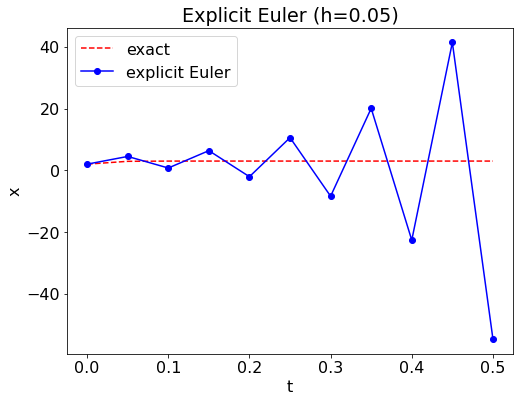

In [2]:
"""This example shows stiffness in the numerical solution of an ODE.
- vary the following parameters for a good illustration of stiffness:
  h = 0.001, 0.01, 0.05
  a = -50.,
"""
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

# experiemental parameters
h = 0.05
a = -50.

# numerical settings
N = 10
T = h*N
tt = np.arange(0., T+0.5*h, h)

# IVP settings
f = lambda t, x: a*(x - b)
x0 = 2.
b = 3.

# exact solution
x_exact = (x0 - b)*np.exp(a*tt) + b

# numerical solution: explicit Euler
xx = np.zeros(N+1)
xx[0] = x0
for i in range(N):
    xx[i+1] = xx[i] + h*f(tt[i], xx[i])

# plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(tt, x_exact,'r--' , label='exact')
ax.plot(tt, xx, 'bo-', label='explicit Euler')
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title(f'Explicit Euler (h={h:g})')
plt.show()

##### Summary

- There is another stability issue, different from zero-stability, related to *stiffness*.
- Stiffness leads to a concept *A-stability* or *linear stability*. However, we do not pursue this in this course. Just be aware of this issue.
- Stiffness forces small step sizes for many numerical methods, making many methods useless.
- Generally speaking, explicit methods are unfavorable for stiff problems while implicit methods work better. Implicit Euler method and BDF2 is among the most robust method in this regard.


##### Analysis


Explicit calculations with a simple example show the issue vividly.

> **Example** (stiffness)
>
> [Stiffness in a simple 1D example with explicit Euler](https://jhparkyb.github.io/resources/notes/na/ex_StiffODE1DExplicitEuler_lp2000.png)
>
> [Stiffness resolved by implicit Euler in a simple 1D example](https://jhparkyb.github.io/resources/notes/na/ex_StiffODE1DImplicitEuler_lp2000.png)

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)